In [1]:
import torch
import numpy as np
from point_e.util.point_cloud import PointCloud
from point_e.util.plotting import plot_point_cloud

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


(504, 2048, 3)


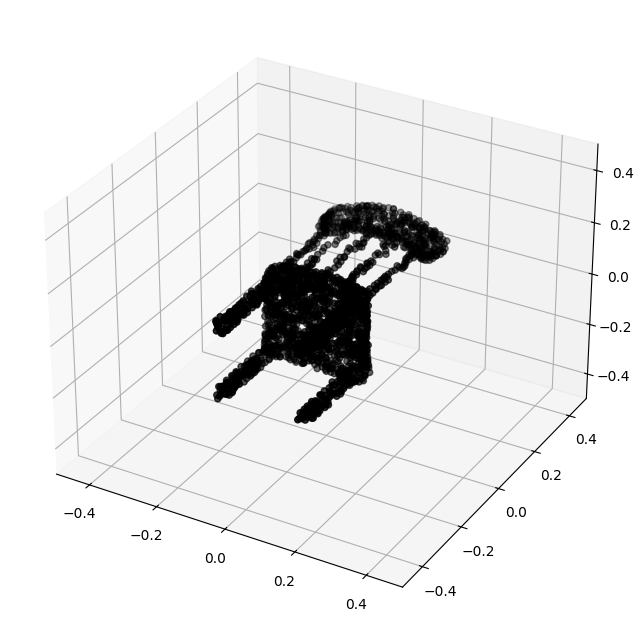

In [40]:
coords = torch.load("/home/noamatia/repos/control_point_e/output.pt").transpose(1, 2).numpy()
theta = np.pi * 2 / 2   
rotation = np.array(
    [
        [np.cos(theta), -np.sin(theta), 0.0],
        [np.sin(theta), np.cos(theta), 0.0],
        [0.0, 0.0, 1.0],
    ]
)
coords = coords @ rotation
theta2 = np.pi * 3 / 2
rotation = np.array(
    [
        [np.cos(theta2), 0.0, np.sin(theta2)],
        [0.0, 1.0, 0.0],
        [-np.sin(theta2), 0.0, np.cos(theta2)],
    ]
)
coords = coords @ rotation
print(coords.shape)
coords = coords[1]
channels = {k: np.zeros_like(coords[:, 0], dtype=np.float32) for k in ["R", "G", "B"]}
pc = PointCloud(coords, channels)
fig = plot_point_cloud(pc)
fig.show()

In [3]:
pc = PointCloud.load_shapenet("/scratch/noam/shapetalk/point_clouds/scaled_to_align_rendering/chair/ShapeNet/4a0e7f1129a9172349bb1cbbf9a4206.npz")